In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [3]:
data.shape

(917, 20)

In [4]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [5]:
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

**Data Preprocessing**

In [6]:
data.describe()

,Index,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,9.170000e+02
mean,459.000000,729.759324,2562.008724,28.694329,7.242007,1.667045,0.179804,12.802672,64.103762,21.953719,7.999945,4.358997,0.146205,2.123228,0.947895,2.181025e+118
std,264.859397,553.978537,0.820008,1.845115,0.462830,1.282984,0.389665,9.397183,22.350496,17.194847,5.133194,3.600244,0.131068,0.692240,0.519764,6.604582e+119
min,1.000000,12.000000,2561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,230.000000,221.000000,2561.000000,28.500000,7.130000,0.510000,0.000000,6.250000,51.000000,12.000000,4.100000,1.500000,0.020000,1.700000,0.520000,1.220000e+08
50%,459.000000,591.000000,2562.000000,29.000000,7.290000,1.600000,0.000000,9.800000,60.500000,17.000000,7.100000,3.460000,0.110000,2.000000,0.900000,1.530000e+10
75%,688.000000,1191.000000,2563.000000,29.300000,7.400000,2.600000,0.200000,15.830000,72.100000,26.000000,10.800000,6.100000,0.210000,2.500000,1.250000,2.100000e+12
max,917.000000,1822.000000,2563.000000,31.900000,9.100000,9.700000,5.000000,84.500000,202.000000,148.300000,39.800000,23.330000,0.730000,8.600000,3.530000,2.000000e+121


Check for column types.

In [7]:
data.dtypes

Index      int64
CID      float64
Year       int64
CN        object
WSP       object
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Drop unnecessary columns from the dataset.

In [8]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [9]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Check for null values in the dataset.

In [10]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [11]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,"Mother Earth Muay Hair Monument, Sanam Luang",Khlong Khu Mueang Derm
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,Phra Pinklao Police Station,Khlong Khu Mueang Derm
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,Bridge in front of the Ministry of Interior,Khlong Khu Mueang Derm


In [12]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [13]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [14]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

In [15]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [16]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

In [17]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN      int64
CNEN       int64
dtype: object

In [18]:
data.head(3)

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61


**Feature Engineering**

Here lets engineer a new feature called ISQA (Simple Water Quality Index) using the formula 
- ISQA = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

columns_to_normalize = ["Temp", "BO", "SS", "DO"]
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Calculate ISQA
def calculate_isqa(row):
    isqa = row["Temp"] * (row["BO"] + row["SS"] + row["DO"])
    return isqa


data["ISQA"] = data.apply(calculate_isqa, axis=1)
# Rescale ISQA to be between 0 and 100
scaler_isqa = MinMaxScaler(feature_range=(0, 100))

# Reshape ISQA column to 2D for scaling
data["ISQA"] = scaler_isqa.fit_transform(data["ISQA"].values.reshape(-1, 1))

# Show the first few rows of the ISQA column
print(data["ISQA"].head())


0    28.741957
1    26.630712
2    22.208356
3    26.410830
4    14.713759
Name: ISQA, dtype: float64


In [20]:
data['ISQA'].describe()

count    917.000000
mean      30.477172
std       11.652265
min        0.000000
25%       22.731532
50%       29.134353
75%       36.462515
max      100.000000
Name: ISQA, dtype: float64

In [21]:
# From water quality index (WQI) calculate potability and classify as 2 (safe), 1 (potentially unsafe), 0(unsafe)
def calc_water_potability(m):
    if m > 75:
        return 2
    
    if m > 50:
        return 1
    
    return 0

data['target'] = data['ISQA'].apply(calc_water_potability)
data['target'].value_counts()

target
0    868
1     42
2      7
Name: count, dtype: int64

Box plot of `target` variable and `NO2N` value of water.

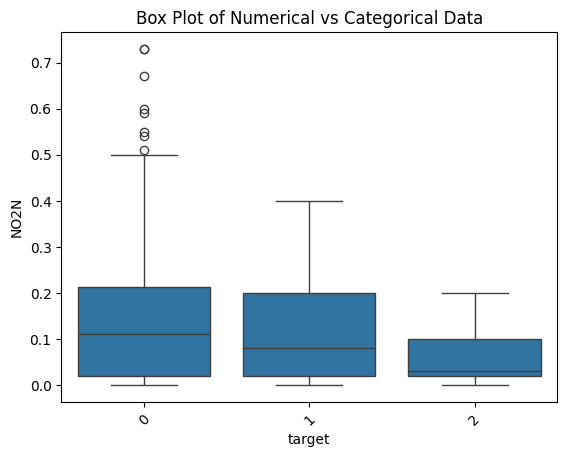

In [22]:
sns.boxplot(x='target', y='NO2N', data=data)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical vs Categorical Data')
plt.show()

Swarm plot for numerical data `pH` and categorical data `target`

/home/puskr/ml_project/ml-project-water-potability/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/puskr/ml_project/ml-project-water-potability/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


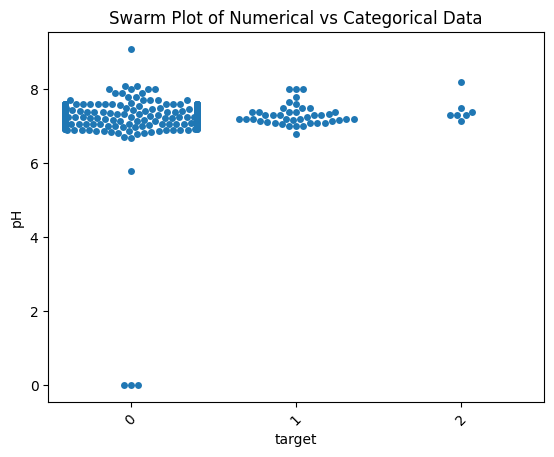

In [23]:
sns.swarmplot(x='target', y='pH', data=data)
plt.xticks(rotation=45)
plt.title('Swarm Plot of Numerical vs Categorical Data')
plt.show()

Pair plot between ph value of water and Ammonia Nitrate in water.

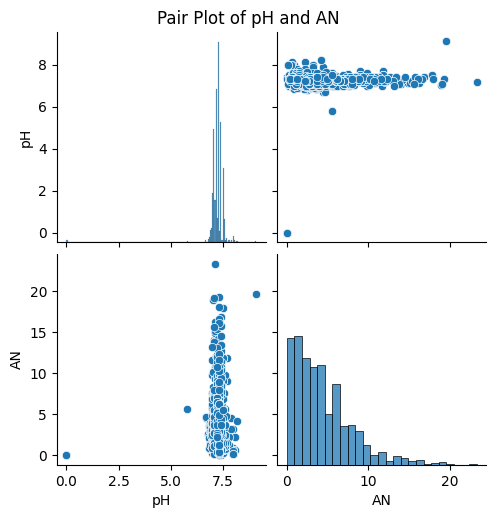

In [24]:
sns.pairplot(data=data[['pH', 'AN']])
plt.suptitle('Pair Plot of pH and AN', y=1.02)
plt.show()

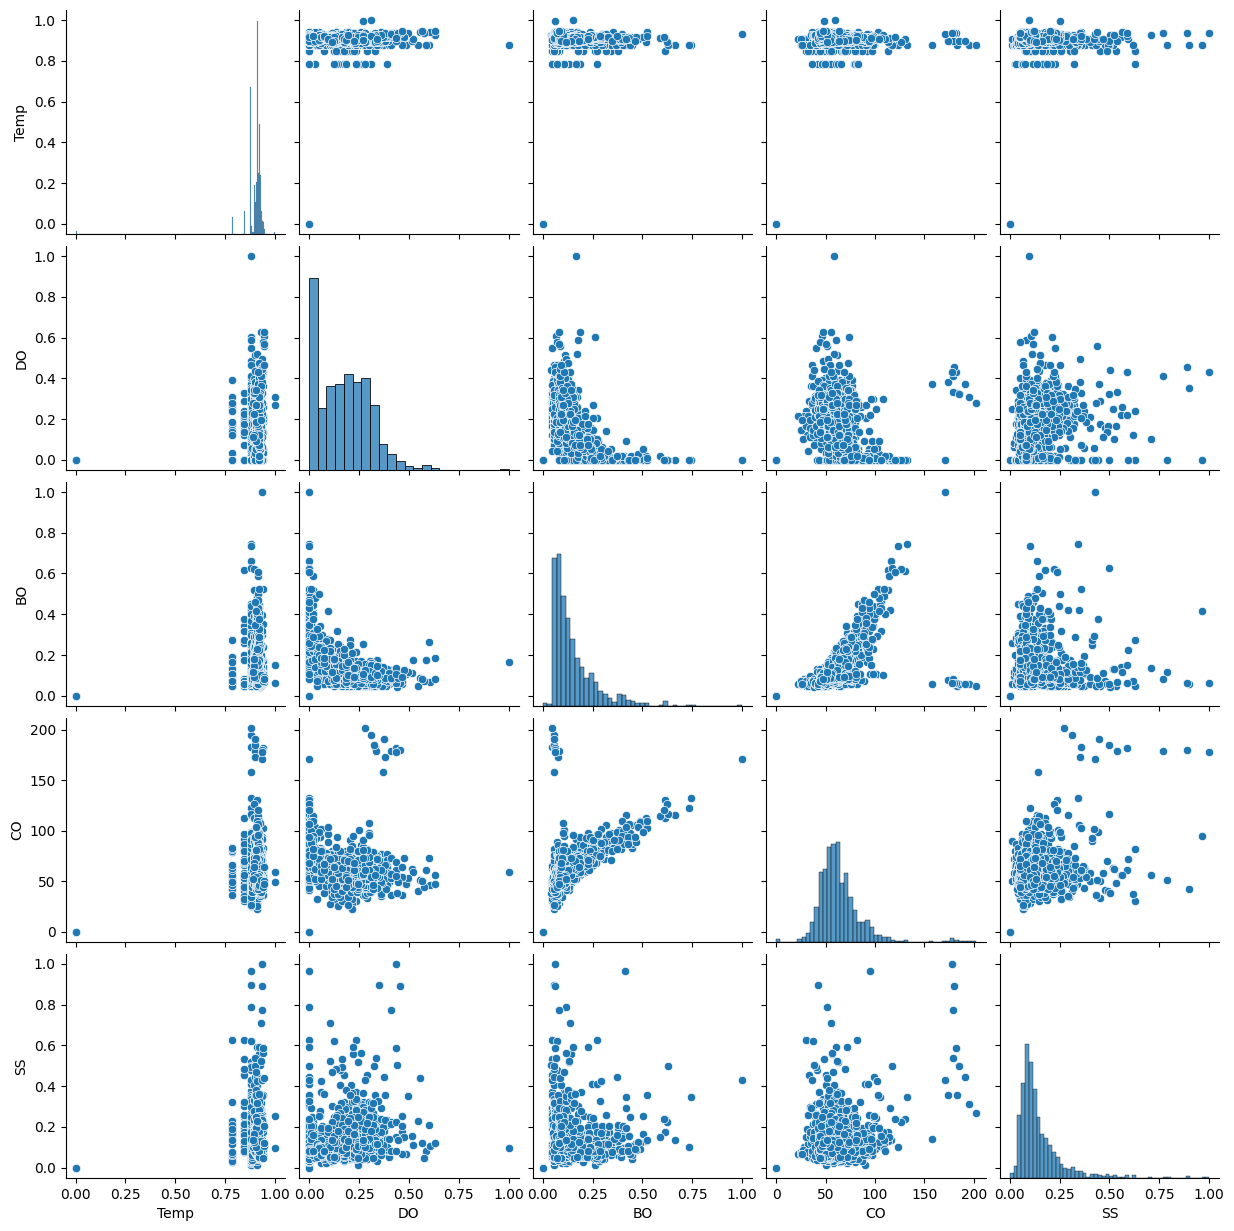

In [25]:
feats = data[['Temp', 'DO', 'BO', 'CO', 'SS']]

sns.pairplot(feats, diag_kind='hist')

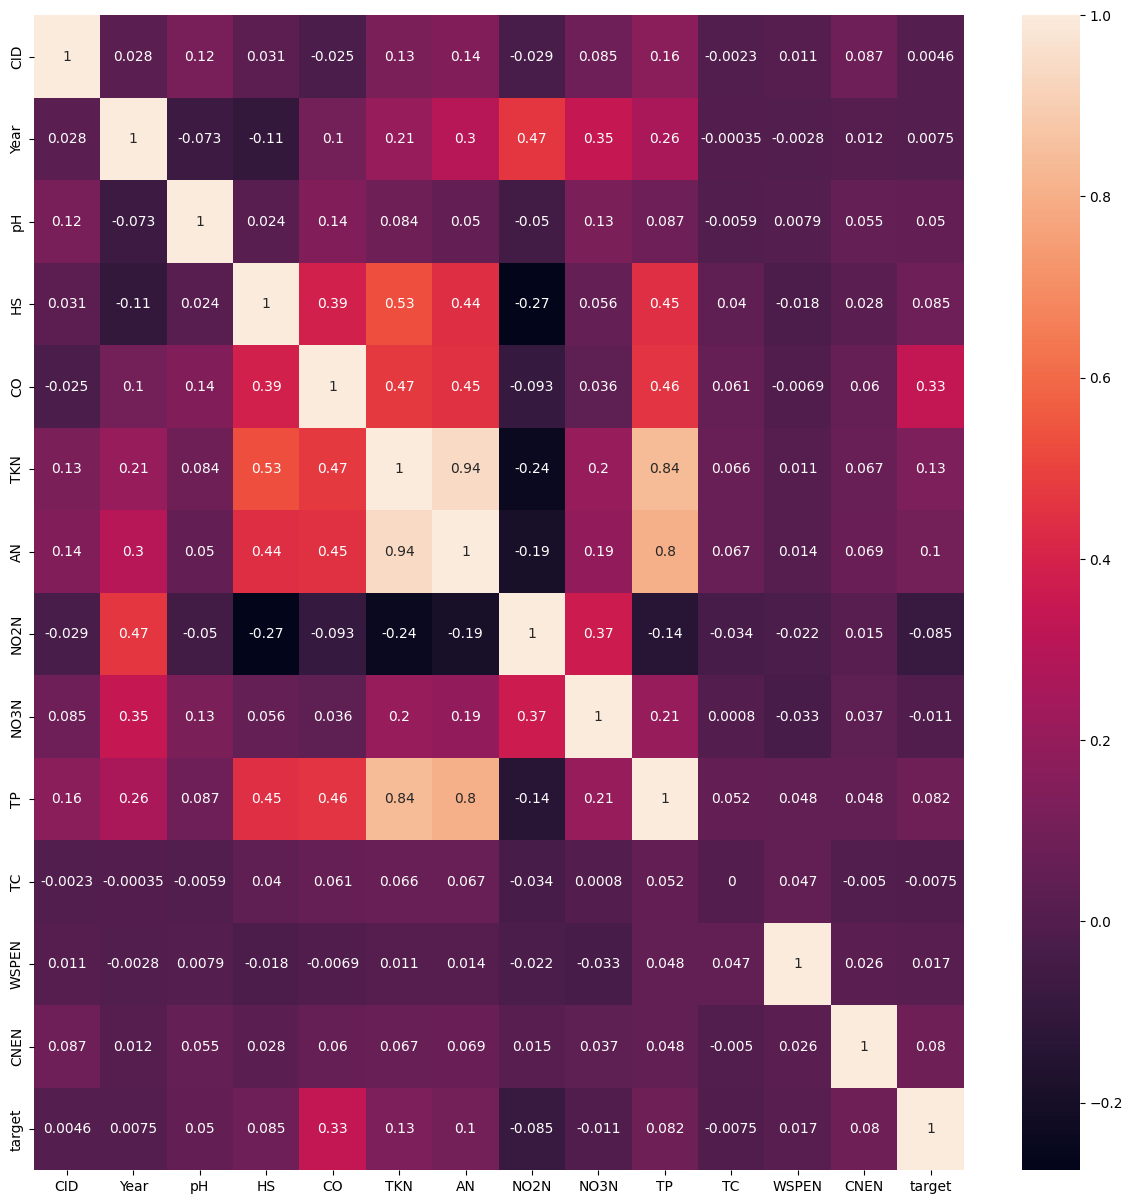

In [26]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.drop(columns=['BO', 'SS', 'Temp', 'DO', 'ISQA']).corr(numeric_only=True), annot=True)
plt.show()

In [27]:
data['target'].value_counts()

target
0    868
1     42
2      7
Name: count, dtype: int64

In [28]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN', 'ISQA', 'target'],
      dtype='object')

**Feature Selection**

In [29]:
X = data[ ['CID', 'Year', 'pH', 'HS', 'CO', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'] ]

y = data['target']

In [30]:
from sklearn.utils import resample

# Separate class 1
X_class1 = X[y == 1]
y_class1 = y[y == 1]

# Upsample class 0 manually (e.g., to 50)
X_class1_up, y_class1_up = resample(X_class1, y_class1,
                                    replace=True,
                                    n_samples=100,
                                    random_state=42)

# Combine with rest
X_rest = X[y != 1]
y_rest = y[y != 1]

X = np.vstack((X_rest, X_class1_up))
y = np.concatenate((y_rest, y_class1_up))

In [31]:
from sklearn.utils import resample

# Separate class 2
X_class2 = X[y == 2]
y_class2 = y[y == 2]

# Upsample class 0 manually (e.g., to 50)
X_class2_up, y_class2_up = resample(X_class2, y_class2,
                                    replace=True,
                                    n_samples=100,
                                    random_state=42)

# Combine with rest
X_rest = X[y != 2]
y_rest = y[y != 2]

X = np.vstack((X_rest, X_class2_up))
y = np.concatenate((y_rest, y_class2_up))

**Train Test Split**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

Since we have class imbalance we need to do oversampling here.

In [350]:
# from imblearn.over_sampling import SMOTE

# smote =SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [351]:
# y_train_resampled.value_counts()

Scale the features using standard scalar for faster convergence.

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

y_train_resampled = y_train

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

algorithms = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [39]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=7, shuffle=True)

for name, model in algorithms.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='f1_weighted')
    mean_score = scores.mean()
    print(f"{name} - Score: {scores}; Mean: {scores.mean()}")

Random Forest - Score: [0.96600312 0.97440534 0.99199859 0.99205651 0.95706139 0.99209815
 0.98278119]; Mean: 0.9794863279079272
Logistic Regression - Score: [0.84933646 0.90639873 0.84898686 0.80866356 0.80218163 0.78365385
 0.84099578]; Mean: 0.8343166949392984
Gradient Boosting - Score: [0.98380095 0.98388286 0.97371441 0.98300714 0.98410484 0.96868518
 1.        ]; Mean: 0.9824564808923364


In [40]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 10, 20, 30],        # maximum depth of each tree
    'max_features': ['sqrt', 'log2', None], # number of features to consider when looking for best split
    'bootstrap': [True, False]              # whether bootstrap samples are used
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1_weighted')

# Fit to training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 7 folds for each of 72 candidates, totalling 504 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_est

In [41]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=300, random_state=42)

In [42]:
import joblib

model_name = 'wpp_model.pkl'

joblib.dump(grid_search.best_estimator_, model_name)

['wpp_model.pkl']

In [43]:
# Load the model
loaded_model = joblib.load(model_name)

# Make predictions
y_pred = loaded_model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       172
           1       1.00      0.55      0.71        20
           2       0.94      0.73      0.82        22

    accuracy                           0.93       214
   macro avg       0.96      0.76      0.83       214
weighted avg       0.93      0.93      0.92       214

